In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train: ", x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values



x_train:  (50000, 32, 32, 3)


In [10]:
x_train, x_test = x_train , x_test 
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test, (Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (50000, 3072)
x_test:  (10000, 3072)
y_train:  (50000, 10)
y_test:  (10000, 10)


In [11]:
def sigmoid(z):
    s = 1./(1 + np.exp(-z))
    return s

In [12]:
def calc_accuracy(x,y):
    h = sigmoid( np.matmul(x, w1) + b1 )
    f = np.matmul(h, w2) + b2
    pred = np.zeros(f.shape)
    pred[np.arange(f.shape[0]), np.argmax(f, axis=1)] = 1
    same = 0
    m = x_test.shape[0]
    for i in range(m):
        if( np.array_equal(pred[i],y[i]) ):
            same +=1
    accuracy = 100*same/m
    return accuracy

In [17]:
std=1e-5
H = 200
w1 = std*np.random.randn(Din, H)
b1 = np.zeros((1,H))
w2 = std*np.random.randn(H, K)
b2 = np.zeros((1,K))
print("w1:", w1.shape)
print("w2:", b1.shape)
batch_size = 500
batches = Ntr//batch_size
iterations = 300
lr = 0.015
lr_decay= 0.999
reg = 5e-8
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    for batch_no in range(batches):
        x_batch = x_train[batch_no*batch_size: (batch_no+1)*batch_size,:]
        y_batch = y_train[batch_no*batch_size: (batch_no+1)*batch_size,:]

        indices = np.arange(batch_size)
        rng.shuffle(indices)
        # Forward pass

        X = x_batch[indices]
        Y = y_batch[indices]

        h = sigmoid( np.matmul(X, w1) + b1 )
        y_pred = np.matmul(h, w2) + b2
        dy = y_pred - Y
        loss = (1/batch_size)*np.square(dy).sum() + reg*( np.sum(w1**2) + np.sum(w2**2) )
        loss_history.append(loss)
        #if t%20==0:
        
        
        # Backward pass
        dw2 = (2/batch_size)* np.matmul(h.T, dy) + 2*reg*w2
        db2 = (2/batch_size)* np.sum(dy, axis = 0)

        dh = (2/batch_size)* np.matmul(dy, w2.T)
        dz1 = dh*h*(1-h)
        dw1 = np.matmul(X.T, dz1) + 2*reg*w1
        db1 = np.sum(dz1, axis = 0)

        w1 -= lr*dw1
        b1 -= lr*db1
        w2 -= lr*dw2
        b2 -= lr*db2
        lr = lr_decay*lr

        train_acc_history.append( calc_accuracy(x_train,y_train) )
        val_acc_history.append( calc_accuracy(x_test,y_test) )
        print("t = ",t," ;loss = ",loss_history[-1])


92154774932
t =  79  ;loss =  0.5934288626370715
t =  79  ;loss =  0.5726177628573564
t =  79  ;loss =  0.6004496152866173
t =  80  ;loss =  0.5861343663066453
t =  80  ;loss =  0.5843356617325529
t =  80  ;loss =  0.5628947877889381
t =  80  ;loss =  0.5961380401249995
t =  80  ;loss =  0.5979488454634724
t =  80  ;loss =  0.5968865599791472
t =  80  ;loss =  0.6072347380352795
t =  80  ;loss =  0.5852597259447608
t =  80  ;loss =  0.6107739280743624
t =  80  ;loss =  0.5835645209850973
t =  80  ;loss =  0.6057883883292015
t =  80  ;loss =  0.5871668024139232
t =  80  ;loss =  0.5901216219711428
t =  80  ;loss =  0.5790454517377401
t =  80  ;loss =  0.5888036972700676
t =  80  ;loss =  0.598492648227316
t =  80  ;loss =  0.6003715233628832
t =  80  ;loss =  0.5874875994115686
t =  80  ;loss =  0.6179744664878387
t =  80  ;loss =  0.5927838170369335
t =  80  ;loss =  0.5976622555885756
t =  80  ;loss =  0.5933844293131434
t =  80  ;loss =  0.6018717538357159
t =  80  ;loss =  0.5983278

KeyboardInterrupt: 

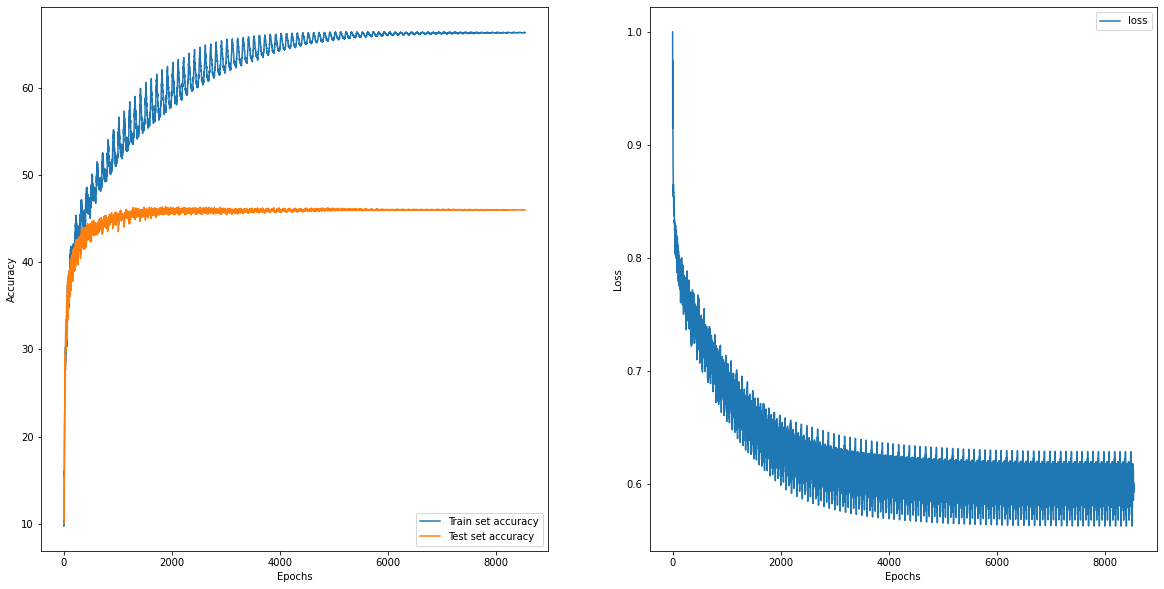

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(train_acc_history, label='Train set accuracy')
ax[0].plot(val_acc_history, label = 'Test set accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

ax[1].plot(loss_history, label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

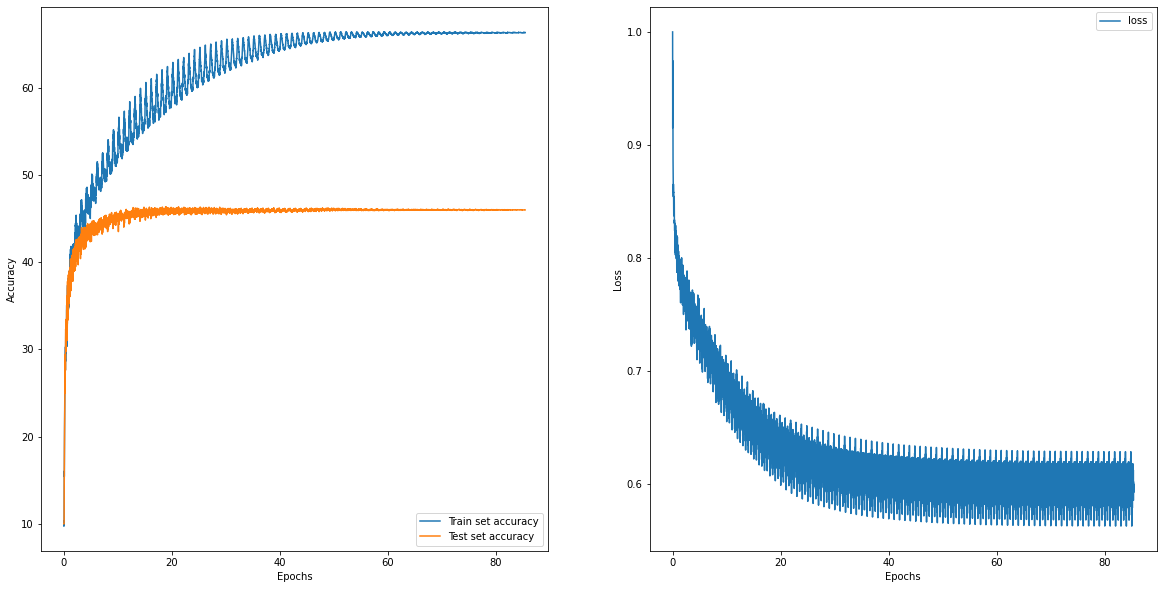

In [22]:
epochs = [i/100 for i in range(8539)]
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(epochs, train_acc_history, label='Train set accuracy')
ax[0].plot(epochs, val_acc_history, label = 'Test set accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

epochs = [i/100 for i in range(8540)]
ax[1].plot(epochs, loss_history, label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

In [23]:
print(loss_history[-1])
print(train_acc_history[-1])
print(val_acc_history[-1])

0.5989096783263287
66.33
45.99
